<a href="https://colab.research.google.com/github/NoCodeProgram/deepLearning/blob/main/nn/classification_b_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/NoCodeProgram/deepLearning.git


Cloning into 'deepLearning'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 60 (delta 10), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (60/60), 1.85 MiB | 4.90 MiB/s, done.


In [2]:
import torch
import pandas as pd

# Load the DataFrame from a CSV file
df = pd.read_csv('./deepLearning/nn/classify5k.csv')

# Convert the DataFrame to a numpy array
data = df[['x', 'y']].values
labels = df['label'].values.reshape(-1, 1)

# Print the shapes of the data and labels
print(f'Data shape:{data.shape}')
print(f'Labels shape:{labels.shape}')


Data shape:(5000, 2)
Labels shape:(5000, 1)


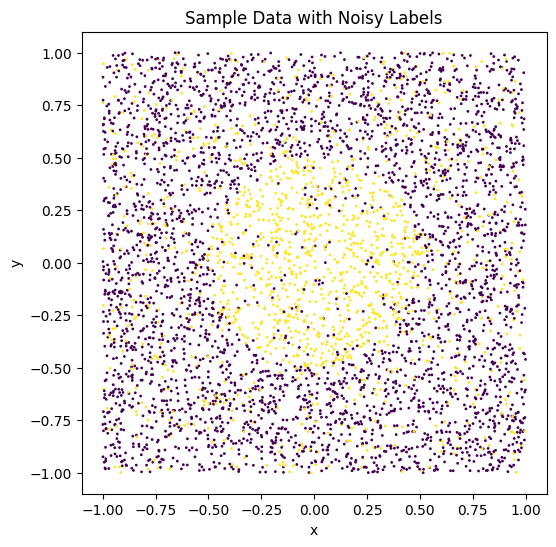

In [3]:
import matplotlib.pyplot as plt

# Plot the points
plt.figure(figsize=(6, 6))
plt.scatter(data[:,0], data[:,1], c=labels, cmap='viridis', s=1)
plt.title('Sample Data with Noisy Labels')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [4]:
# Convert the numpy arrays to PyTorch tensors
data_torch = torch.tensor(data, dtype=torch.float32)
labels_torch = torch.tensor(labels, dtype=torch.float32)
data_length = len(data_torch)
split_length = int(0.8*data_length)

train_data = data_torch[:split_length]
train_labels = labels_torch[:split_length]
val_data = data_torch[split_length:]
val_labels = labels_torch[split_length:]

print(train_data.shape, train_labels.shape)

torch.Size([4000, 2]) torch.Size([4000, 1])


In [5]:
g = torch.Generator().manual_seed(42)

def get_batch(data, labels, batch_size=256):
    # Generate random indices
    indices = torch.randint(0, len(data), size=(batch_size,), generator= g)

    # Select the data and labels at these indices
    data_batch = data[indices]
    labels_batch = labels[indices]

    return data_batch, labels_batch

data_batch, labels_batch = get_batch(train_data,train_labels)
print(data_batch.shape, labels_batch.shape)

torch.Size([256, 2]) torch.Size([256, 1])


In [6]:
#ask gpt
import torch
import torch.nn as nn
import torch.optim as optim

# Define the size of each layer
input_size = 2  # The input size is 2 (x and y coordinates)
hidden_size = 4  # The size of the hidden layer
output_size = 1  # The output size is 1 (for binary classification)

# Define the network as a subclass of nn.Module
g.manual_seed(42)
torch.manual_seed(42)

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.seq_model = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.seq_model(x)


# Create an instance of the network
net = Net()
# Define the loss function
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

for steps in range(100000):
    net.train()
    data_batch, labels_batch = get_batch(data_torch, labels_torch, batch_size=256)
    output = net(data_batch)  # Remove the extra dimension from the output
    loss = loss_fn(output, labels_batch)  # Convert labels to float

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if steps % 1000 == 0:
        net.eval()
        output = net(val_data)
        val_loss = loss_fn(output, val_labels) #recheck the order
        print(f"{steps} val_loss: {val_loss.item()}")


0 val_loss: 0.9213314056396484
1000 val_loss: 0.6011289358139038
2000 val_loss: 0.5999171137809753
3000 val_loss: 0.5986946225166321
4000 val_loss: 0.5972920060157776
5000 val_loss: 0.5955888628959656
6000 val_loss: 0.5931885838508606
7000 val_loss: 0.5902618765830994
8000 val_loss: 0.5864421725273132
9000 val_loss: 0.5818878412246704
10000 val_loss: 0.5770291686058044
11000 val_loss: 0.5718410611152649
12000 val_loss: 0.5667085647583008
13000 val_loss: 0.5617899894714355
14000 val_loss: 0.5565539598464966
15000 val_loss: 0.5486124157905579
16000 val_loss: 0.5385783910751343
17000 val_loss: 0.529022216796875
18000 val_loss: 0.5205901861190796
19000 val_loss: 0.5133546590805054
20000 val_loss: 0.5069391131401062
21000 val_loss: 0.5016184449195862
22000 val_loss: 0.4974716007709503
23000 val_loss: 0.49398455023765564
24000 val_loss: 0.49139589071273804
25000 val_loss: 0.489406019449234
26000 val_loss: 0.4875999987125397
27000 val_loss: 0.48652786016464233
28000 val_loss: 0.48502191901206

(100000, 1)


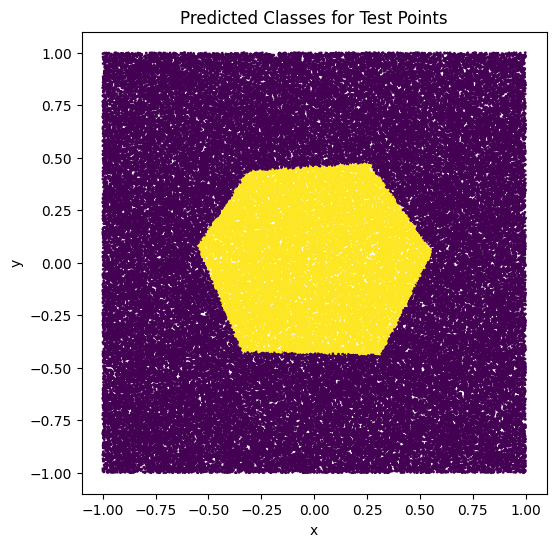

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 10000 new points
n_points_test = 100000
points_test = np.random.uniform(-1, 1, (n_points_test, 2))
# Convert the points to a PyTorch tensor
points_test_torch = torch.from_numpy(points_test).float()

net.eval()
output_test = net(points_test_torch)

probabilities = torch.sigmoid(output_test)
predictions = (probabilities > 0.5).float()

# Convert the predictions to a numpy array
predictions_np = predictions.numpy()
print(predictions_np.shape)

# Plot the points, colored by their predicted class
plt.figure(figsize=(6, 6))
plt.scatter(points_test[:, 0], points_test[:, 1], c=predictions_np, cmap='viridis', s=1)
plt.title('Predicted Classes for Test Points')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
